In [9]:
import pandas as pd
df = pd.read_csv("C:\\Users\\harvi\\Downloads\\richardson weather for 5 years.csv")
df.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN,TOBS
0,USC00417588,"RICHARDSON, TX US",06/30/25,0.0,94.0,76.0,80.0
1,USC00417588,"RICHARDSON, TX US",06/29/25,0.0,95.0,79.0,88.0
2,USC00417588,"RICHARDSON, TX US",06/28/25,0.0,94.0,78.0,86.0
3,USC00417588,"RICHARDSON, TX US",06/27/25,0.0,93.0,74.0,85.0
4,USC00417588,"RICHARDSON, TX US",06/26/25,0.0,93.0,75.0,79.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   PRCP     1827 non-null   float64
 4   TMAX     1825 non-null   float64
 5   TMIN     1825 non-null   float64
 6   TOBS     1825 non-null   float64
dtypes: float64(4), object(3)
memory usage: 100.0+ KB


In [11]:
df.isnull().sum()

STATION    0
NAME       0
DATE       0
PRCP       0
TMAX       2
TMIN       2
TOBS       2
dtype: int64

In [12]:
df.describe().round(0)

,PRCP,TMAX,TMIN,TOBS
count,1827.0,1825.0,1825.0,1825.0
mean,0.0,77.0,57.0,65.0
std,0.0,16.0,17.0,17.0
min,0.0,19.0,0.0,5.0
25%,0.0,67.0,44.0,53.0
50%,0.0,79.0,59.0,67.0
75%,0.0,91.0,72.0,78.0
max,4.0,109.0,90.0,96.0


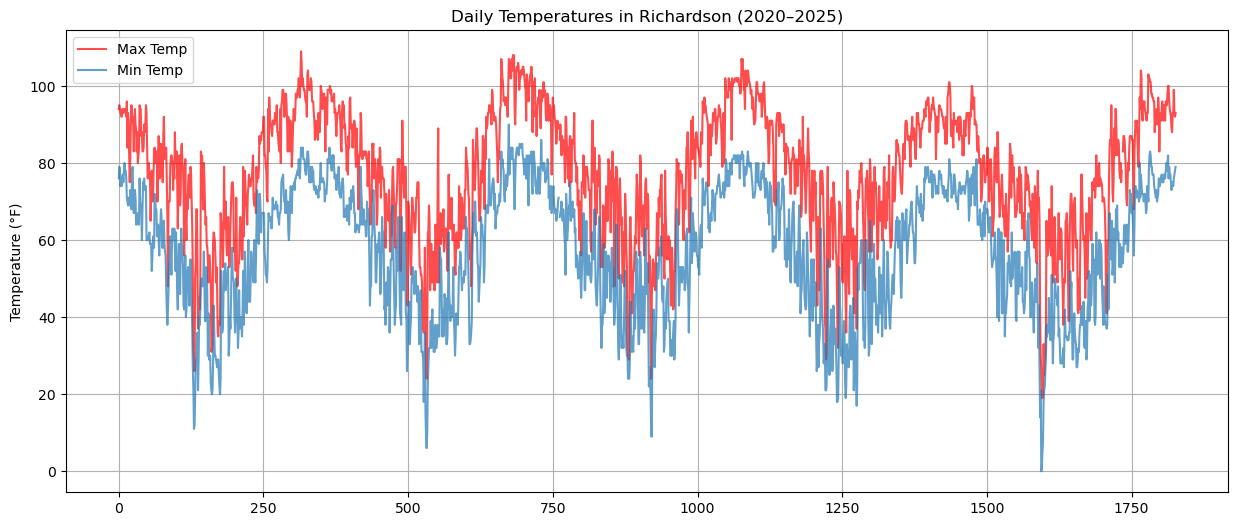

In [13]:
import matplotlib.pyplot as plt

# Plot daily max and min temperature
plt.figure(figsize=(15,6))
df['TMAX'].plot(label='Max Temp', alpha=0.7, color='red')
df['TMIN'].plot(label='Min Temp', alpha=0.7)
plt.title('Daily Temperatures in Richardson (2020–2025)')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# As we can see on the graph, there is an outlier in early 2021. This was due to the events of Winter Storm Uri.

In [15]:
# Top 10 hottest days
df.sort_values('TMAX', ascending=False).head(10)[['TMAX']]

,TMAX
315,109.0
682,108.0
683,108.0
681,108.0
674,107.0
679,107.0
1076,107.0
1078,107.0
661,107.0
675,106.0


In [16]:
# Top 10 coldest days
df.sort_values('TMIN').head(10)[['TMIN']]

,TMIN
1594,0.0
1595,1.0
1596,5.0
532,6.0
1597,8.0
921,9.0
531,9.0
920,9.0
533,10.0
130,11.0


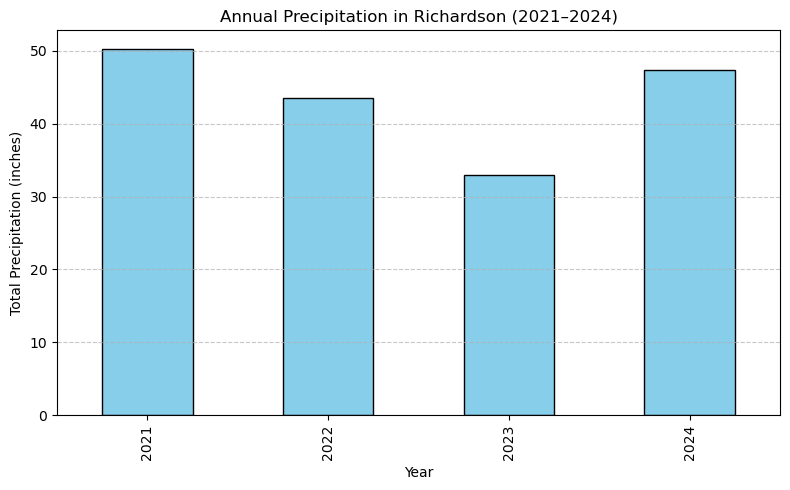

In [28]:
# Now extract the year
df['year'] = df.index.year

# Filter for full years only
full_years = df[(df['year'] >= 2021) & (df['year'] <= 2024)]

# Group and plot
annual_precip = full_years.groupby('year')['PRCP'].sum()

plt.figure(figsize=(8, 5))
annual_precip.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Annual Precipitation in Richardson (2021–2024)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


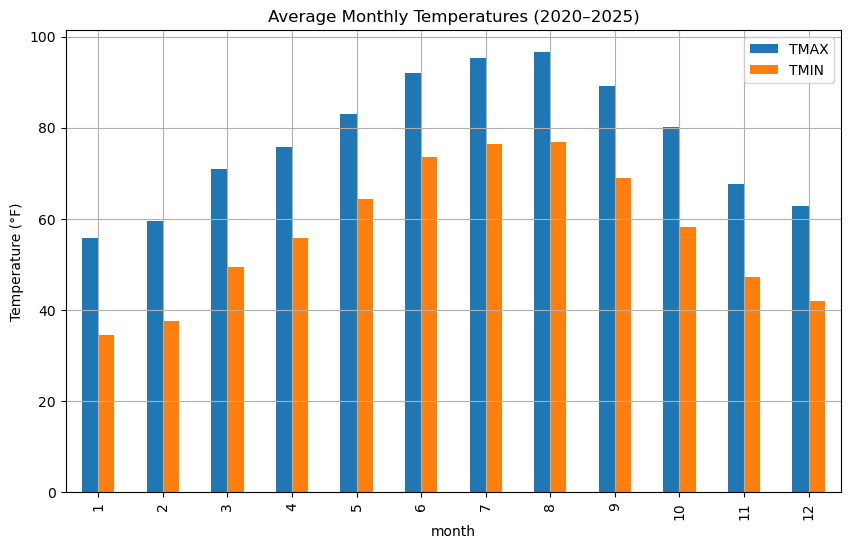

In [25]:
df['month'] = df.index.month
monthly_avg = df.groupby('month')[['TMAX', 'TMIN']].mean()

monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Average Monthly Temperatures (2020–2025)')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()

In [19]:
df.sort_values('PRCP', ascending=False).head(10)[['PRCP']]

,PRCP
1486,4.10
1755,3.53
1506,3.50
26,3.40
1043,3.20
980,3.10
1133,2.87
396,2.80
152,2.70
421,2.67


In [20]:
# Days with the highest precipitation.